In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("IRIS.csv")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['species'] = df['species'].map({'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica': 2})

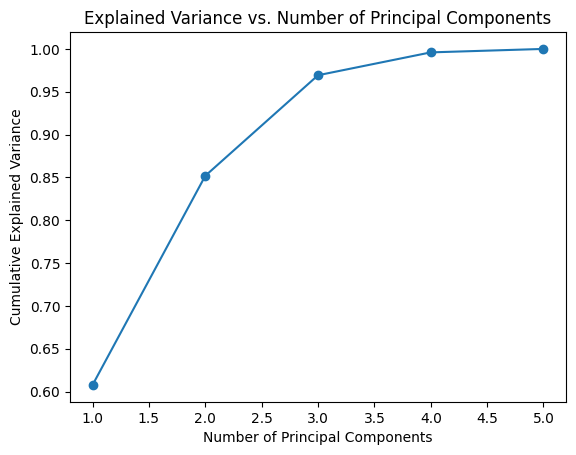

R^2 Score: 0.9978231587855125


In [9]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numerical_features]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

n_components = 0.95
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2}')